In [1]:
import torch
import os
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
dataset_path = "../data/WalkingDynamicsH36M"
split = "test"
history_length = 50
with open(os.path.join(dataset_path, f"{split}_poses.json"), 'r') as f:
        data = torch.from_numpy(np.array(json.load(f)))/1000 #(221, 2, 16, 39)
        
final_seqs = data
save_dir = dataset_path

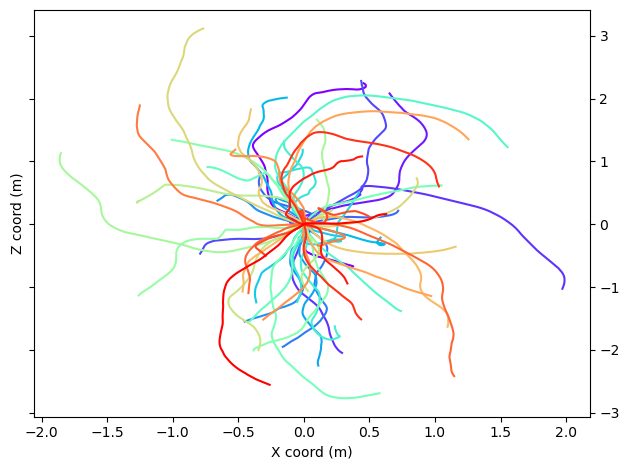

In [3]:
from matplotlib.pyplot import cm
fig, axes = plt.subplots() # rows, columns 4, 3
# colors = ["r", "b", "k", "y", "g", "m", "pink"]
colors = cm.rainbow(np.linspace(0, 1, len(final_seqs)))
fig.tight_layout() 
axes.set_xlabel("X coord (m)")
axes.set_ylabel("Z coord (m)")
# axes.tick_params(labeltop=True, labelright=True)
axes.yaxis.tick_right()
axes.yaxis.set_ticks_position('both')
for s, seq in enumerate(final_seqs):
    seq_centered =  seq - seq[..., history_length-1, :, :].unsqueeze(-3)
    xz_plane = np.stack([seq_centered[...,0, 0], seq_centered[...,0, 2]], axis=-1)
    axes.plot(xz_plane[...,0], xz_plane[...,1], c=colors[s])
plt.tight_layout() 
plt.savefig(os.path.join(save_dir, 'Trajectory_test_sequences_centered_t_in_frames.png'))